# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

<AxesSubplot:xlabel='children', ylabel='debt'>

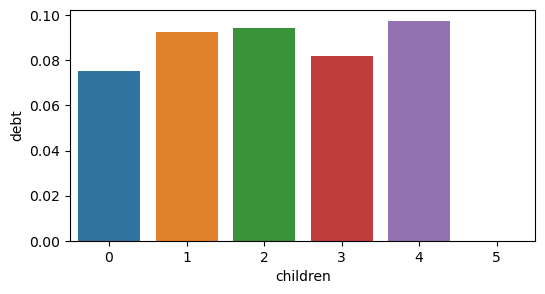

In [23]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_child = data['children']
debt = data['debt']
plt.figure(figsize=(6,3))
sns.barplot(x = data_child, y = debt, ci=None)

In [24]:
data_child.value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

**Вывод:** 
Семьи с 4 и 5 детьми мы отбрасываем, как малоинформативные - количество семей с таким количеством детей мало и в данном случае не дает нам нужную информацию в полном объеме.
В семьях с 1 и 2 детьми уровень задолженностей в среднем выше, чем у семей с 1 или 3 детьми.

In [25]:
#Вывожу соотношение "дети-задолженность"
#Построена сводная таблица, где мы видим, что семьи с 1,2,4 детьми - самые большие должники.
#С 4 детьми слишком маленькая категория - не берем в расчет.

pivot_children_debt = data.pivot_table(index = 'children', values = 'debt', aggfunc = ['mean', 'count'])
pivot_children_debt

,mean,count
,debt,debt
children,,
0,0.075438,14091
1,0.092346,4808
2,0.094542,2052
3,0.081818,330
4,0.097561,41
5,0.000000,9


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<AxesSubplot:xlabel='debt', ylabel='family_status'>

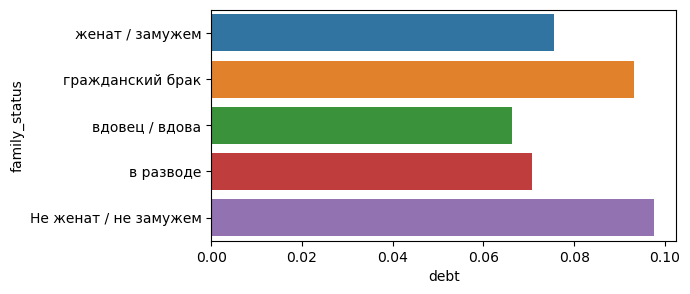

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_family = data['family_status']
debt = data['debt']
plt.figure(figsize=(6,3))
sns.barplot(x = debt, y = data_family, ci=None)

In [27]:
data_family.value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

In [28]:
pivot_family_debt = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['mean', 'count'])
pivot_family_debt
#в сводной таблице проще увидеть, что категория гражданский брак является самыми большими должниками
#(количество 4134 против 2796 в категории не женат/не замужем)

,mean,count
,debt,debt
family_status,,
Не женат / не замужем,0.097639,2796
в разводе,0.070648,1189
вдовец / вдова,0.066246,951
гражданский брак,0.093130,4134
женат / замужем,0.075606,12261


**Вывод:** 
Самая низкая задолженность в категориях "вдовец(вдова)" и "в разводе".
Чуть выше уровень задолженности в категории "женат/замужем".
Самый высокий отрицательный возврат кредита в срок в категориях "гражданский брак" и "не женат/не замужем" (что в принципе, сравнивая названия категорий, может означать одно и то же).

Следовательно, люди, состоящие на текущий момент в браке или состовшие в нем ранее, являются более ответственными заемщиками в плане возврата кредита в срок.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:xlabel='total_income', ylabel='debt'>

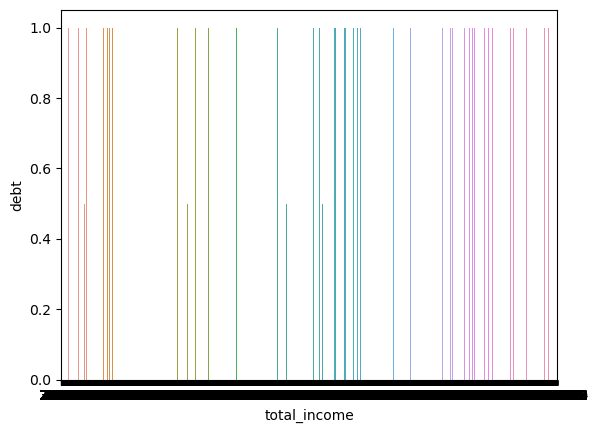

In [37]:
data_income = data['total_income']
debt = data['debt']
sns.barplot(x = data_income, y = debt, ci=None)

In [30]:
pivot_income_debt = data.pivot_table(index = 'total_income', values = 'debt', aggfunc = ['mean', 'count'])
pivot_income_debt
#по разным категориям дохода нет каких-либо выбросов, видим ровные значения вне зависимости от уровня доходов
#тем самым подтверждаем наш вывод, что уровенб дохода не влияет на возврат кредита в срок

,mean,count
,debt,debt
total_income,,
20667,1.0,1
21205,0.0,1
21367,0.0,1
21695,0.0,1
21895,0.0,1
...,...,...
1711309,0.0,1
1715018,0.0,1


**Вывод:** 
Уровень дохода не влияет на возврат кредита в срок.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

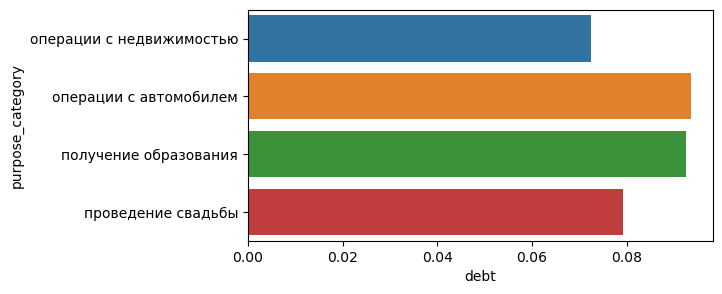

In [35]:
data_purpose = data['purpose_category']
debt = data['debt']
plt.figure(figsize=(6,3))
sns.barplot(x = debt, y = data_purpose, ci=None)

In [36]:
pivot_purpose_debt = data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = ['mean', 'count'])
pivot_purpose_debt
#по сводной талице видим, что операции с автомобилем и образованием практически равны по невозврату долга, среднее - 0.09
#операции с недвижимость явзяются самой обширной категорией(10751 кредитов), но среднее по невозврату - ниже, всего 0.07

,mean,count
,debt,debt
purpose_category,,
операции с автомобилем,0.093480,4279
операции с недвижимостью,0.072551,10751
получение образования,0.092528,3988
проведение свадьбы,0.079118,2313


**Вывод:** 
Цель кредита меньше влияет на возврат кредита в срок, чем семейное положение или количество детей (шкала задолженности меньше).
Операции с недвижимостью и проведение свадьбы - наиболее возвращаемые категории кредитов среди остальных категорий.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
С помощью data.isna().sum() мы вывили пропуски в данных о доходах и данных о трудовом стаже.
Клиенты могли не указать эти данные (или данные были, но по ошибке сотрудники не загрузили их) или же произошел какой-то сбой и данные были утеряны.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Медианные значения дают нам возможность не учитывать в статистике выбросы(например, количество семей с 5 детьми, как наиболее малочисленная категория: 9 семей против 14091 семей без детей).

### Шаг 4: общий вывод.

Если объединить все вышесказанное, то можно определить количество детей и семейное положение самыми влияющими параметрами на возврат кредита в срок.

В семьях с 1 и 2 детьми уровень задолженностей в среднем выше, чем у семей с 1 или 3 детьми.
Самый высокий отрицательный возврат кредита в срок в категориях "гражданский брак" и "не женат/не замужем".
Цель кредита меньше влияет на возврат кредита в срок, чем семейное положение или количество детей.
Уровень дохода не влияет на возврат кредита в срок.

In [33]:
pivot_final = data.pivot_table(index = ['purpose_category', 'family_status', 'children'], values = 'debt', aggfunc = 'count')
pivot_final.sort_values('debt', ascending = False).head(20)
#построили сводную таблицу по самым значимым для нас категориям(не брали в расчет кровень дохода).
#самое большое кол-во должников в операциях с недвижимостью, в статусе женат/замужем, без детей
#хотя, когда мы строили сводные таблицы отдельно по каждой категории, это было не так
#поэтому делаю вывод, что мы правильно вывели отдельно каждую категорию, так как тут данные не дают нам полного понимания картины

debt
purpose_category         family_status         children      
операции с недвижимостью женат / замужем       0         4237
                                               1         1699
операции с автомобилем   женат / замужем       0         1649
получение образования    женат / замужем       0         1582
проведение свадьбы       гражданский брак      0         1530
операции с недвижимостью Не женат / не замужем 0         1287
                         женат / замужем       2          873
операции с автомобилем   женат / замужем       1          685
операции с недвижимостью гражданский брак      0          649
получение образования    женат / замужем       1          591
проведение свадьбы       гражданский брак      1          532
операции с автомобилем   Не женат / не замужем 0          518
операции с недвижимостью вдовец / вдова        0          470
получение образования    Не женат / не замужем 0          457
операции с недвижимостью в разводе             0          431
получение образования    женат / замужем       2          336
операции с автомобилем   женат / замужем       2          324
                         гражданский брак      0          282
получение образования    гражданский брак      0          269
операции с недвижимостью гражданский брак      1          261